# Определение стоимости автомобилей 🚗

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Нам нужно построить модель машинного обучения для определения стоимости.

**Заказчику важны:**

- качество предсказания
- скорость предсказания
- время обучения


**Признаки:**

- `DateCrawled` — дата скачивания анкеты из базы

- `VehicleType` — тип автомобильного кузова

- `RegistrationYear` — год регистрации автомобиля

- `Gearbox` — тип коробки передач

- `Power` — мощность (л. с.)

- `Model` — модель автомобиля

- `Kilometer` — пробег (км)

- `RegistrationMonth` — месяц регистрации автомобиля

- `FuelType` — тип топлива

- `Brand` — марка автомобиля

- `NotRepaired` — была машина в ремонте или нет

- `DateCreated` — дата создания анкеты

- `NumberOfPictures` — количество фотографий автомобиля

- `PostalCode` — почтовый индекс владельца анкеты (пользователя)

- `LastSeen` — дата последней активности пользователя

**Целевой признак :**

- `Price` — цена (евро)

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных-🤨" data-toc-modified-id="Обзор-данных-🤨-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных 🤨</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Предобработка-данных-⚙️" data-toc-modified-id="Предобработка-данных-⚙️-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных ⚙️</a></span><ul class="toc-item"><li><span><a href="#Переименование-признаков" data-toc-modified-id="Переименование-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переименование признаков</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li><li><span><a href="#date_crawled,-date_created,-last_seen" data-toc-modified-id="date_crawled,-date_created,-last_seen-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><em>date_crawled</em>, <em>date_created</em>, <em>last_seen</em></a></span></li><li><span><a href="#repaired" data-toc-modified-id="repaired-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><em>repaired</em></a></span></li><li><span><a href="#Удаление-ошибочных-записей" data-toc-modified-id="Удаление-ошибочных-записей-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Удаление ошибочных записей</a></span><ul class="toc-item"><li><span><a href="#registration_year" data-toc-modified-id="registration_year-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span><em>registration_year</em></a></span></li><li><span><a href="#registration_month" data-toc-modified-id="registration_month-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span><em>registration_month</em></a></span></li><li><span><a href="#power" data-toc-modified-id="power-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span><em>power</em></a></span></li><li><span><a href="#number_of_pictures" data-toc-modified-id="number_of_pictures-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span><em>number_of_pictures</em></a></span></li></ul></li><li><span><a href="#price" data-toc-modified-id="price-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span><em>price</em></a></span></li><li><span><a href="#postal_code" data-toc-modified-id="postal_code-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span><em>postal_code</em></a></span></li><li><span><a href="#model-(+нижняя-граница-в-power)" data-toc-modified-id="model-(+нижняя-граница-в-power)-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span><em>model</em> (+нижняя граница в <em>power</em>)</a></span></li><li><span><a href="#vehicle_type,-gearbox,-fuel_type" data-toc-modified-id="vehicle_type,-gearbox,-fuel_type-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span><em>vehicle_type</em>, <em>gearbox</em>, <em>fuel_type</em></a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Обучение-моделей-🦾" data-toc-modified-id="Обучение-моделей-🦾-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей 🦾</a></span><ul class="toc-item"><li><span><a href="#Формирование-тренировочной-и-тестовой-выборок" data-toc-modified-id="Формирование-тренировочной-и-тестовой-выборок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Формирование тренировочной и тестовой выборок</a></span></li><li><span><a href="#MEstimateEncoder" data-toc-modified-id="MEstimateEncoder-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>MEstimateEncoder</a></span></li><li><span><a href="#StandardScaler" data-toc-modified-id="StandardScaler-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>StandardScaler</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span><tt>Linear Regression</tt></a></span></li><li><span><a href="#HistGradientBoostingRegressor" data-toc-modified-id="HistGradientBoostingRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span><tt>HistGradientBoostingRegressor</tt></a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span><tt>LGBMRegressor</tt></a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span><tt>CatBoostRegressor</tt></a></span></li><li><span><a href="#Результаты-обучения-моделей" data-toc-modified-id="Результаты-обучения-моделей-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Результаты обучения моделей</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Тестирование-модели-💯" data-toc-modified-id="Тестирование-модели-💯-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели 💯</a></span><ul class="toc-item"><li><span><a href="#Test-RMSE" data-toc-modified-id="Test-RMSE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Test RMSE</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Общий-вывод-👀" data-toc-modified-id="Общий-вывод-👀-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод 👀</a></span><ul class="toc-item"><li><span><a href="#Краткая-сводка-по-выполненным-задачам" data-toc-modified-id="Краткая-сводка-по-выполненным-задачам-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Краткая сводка по выполненным задачам</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.-Обзор-данных" data-toc-modified-id="Шаг-1.-Обзор-данных-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Шаг 1. Обзор данных</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span></li><li><span><a href="#Шаг-3.-Обучение-моделей" data-toc-modified-id="Шаг-3.-Обучение-моделей-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Шаг 3. Обучение моделей</a></span></li><li><span><a href="#Шаг-4.-Тестирование-модели" data-toc-modified-id="Шаг-4.-Тестирование-модели-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Шаг 4. Тестирование модели</a></span></li></ul></li></ul></li></ul></div>

## Обзор данных 🤨

### Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from category_encoders.m_estimate import MEstimateEncoder


from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor

from time import time
import urllib
import warnings
from IPython.display import HTML, display

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:10,.2f}'.format

np.set_printoptions(suppress=False)

STATE = np.random.RandomState(42)

warnings.filterwarnings('ignore')

### Получение данных

In [3]:
label = 'autos.csv'

try:
    data = pd.read_csv(
        f'https://code.s3.yandex.net/datasets/{label}')
    data.columns.name = label
    display(data.head(10))
    print('✅ Данные загружены с внешнего ресурса и успешно прочитаны')
except urllib.request.URLError:
    # Если отстутствует доступ к внешнему ресурсу с данными
    while True:
        data_name = input(
            'Укажите имя файла с данными в каталоге с проектом. '
            'Например: "data.csv".\n'
            'Если данные находятся не в каталоге с проектом нажмите Enter.\n\n'
        )
        if not data_name:
            while True:
                data_path = input('Введите абсолютный путь к датасету:\n')
                try:
                    data = pd.read_csv(data_path)
                    data.columns.name = data_path.split('/')[-1]
                    display(data.head(10))
                    print('✅ Исходные данные успешно прочитаны по указанному пути')

                    break

                except FileNotFoundError:  # Путь, указанный пользователем, неверный
                    raise Exception(
                        f'❌Указан неверный путь к файлу: {data_path}')
        else:
            data = pd.read_csv(data_name)
            data.columns.name = data_name
            display(data.head(10))
            print('✅ Исходные данные успешно прочитаны из каталога с проектом')
            break
        break

autos.csv,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


✅ Данные загружены с внешнего ресурса и успешно прочитаны


Запишем сразу изначальный размер датасета в отдельную переменную, чтобы оценить долю объектов, удаленных в ходе предобработки.

In [4]:
start_length = len(data)

In [5]:
def simple_data_view(data):

    print(f'ℹ️ {data.columns.name} Общая сводка по данным\n')
    display(data.info())
    print('\n\n', end='')

    print(f'ℹ️ {data.columns.name} Статистическая сводка по данным\n')
    display(data.describe())
    print('\n\n', end='')

    print(f'ℹ️ {data.columns.name} Сводка по количеству пропусков\n')
    display(HTML(data.isna().sum().to_frame().to_html()))
    print('\n\n', end='')

In [6]:
simple_data_view(data)

ℹ️ autos.csv Общая сводка по данным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-n

None



ℹ️ autos.csv Статистическая сводка по данным



autos.csv,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,"354,369.00","354,369.00","354,369.00","354,369.00","354,369.00","354,369.00","354,369.00"
mean,"4,416.66","2,004.23",110.09,"128,211.17",5.71,0.00,"50,508.69"
std,"4,514.16",90.23,189.85,"37,905.34",3.73,0.00,"25,783.10"
min,0.00,"1,000.00",0.00,"5,000.00",0.00,0.00,"1,067.00"
25%,"1,050.00","1,999.00",69.00,"125,000.00",3.00,0.00,"30,165.00"
50%,"2,700.00","2,003.00",105.00,"150,000.00",6.00,0.00,"49,413.00"
75%,"6,400.00","2,008.00",143.00,"150,000.00",9.00,0.00,"71,083.00"
max,"20,000.00","9,999.00","20,000.00","150,000.00",12.00,0.00,"99,998.00"




ℹ️ autos.csv Сводка по количеству пропусков



,0
autos.csv,
DateCrawled,0
Price,0
VehicleType,37490
RegistrationYear,0
Gearbox,19833
Power,0
Model,19705
Kilometer,0
RegistrationMonth,0


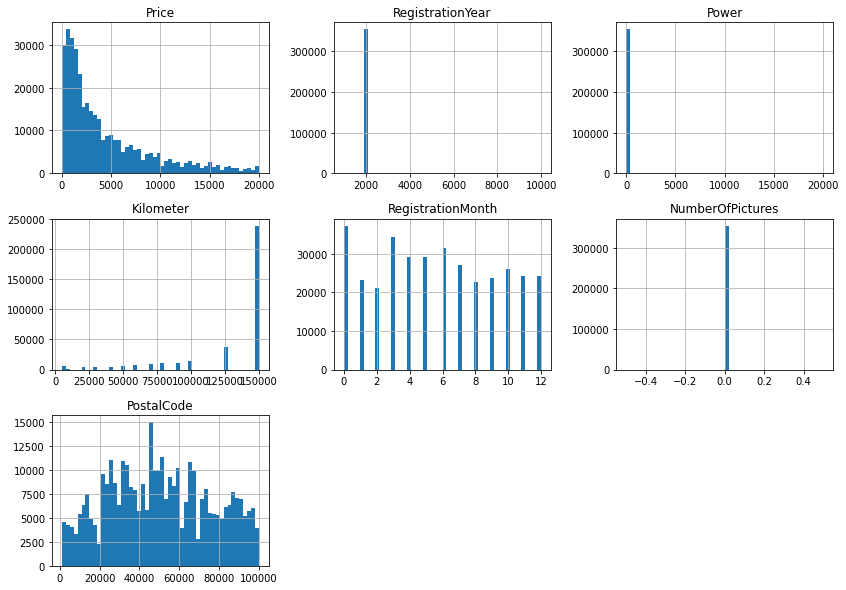

In [7]:
data.hist(figsize=(14, 10), bins=50, grid=True)
plt.show()

In [8]:
data.duplicated().sum()

4

<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
На данном этапе видно следующее:
- Присутствуют пропуски в некоторых столбцах;
- Распределения недискретных величин похожи на нормальные;
- Признак <tt>NumberOfPictures</tt> абсолютно неинформативен, так как содержит только нули;
- Есть 4 явных дубликата; 
- Наименования признаков стоит поменять для удобства;
- Некоторые признаки имеют неверный тип данных;
- 16 признаков: 9+1 категориальные, 6 числовые;
- Есть аномальные значения в некоторых признаках (20000 л.с. в Power, 9999 в RegistrationYear и т.д.).
    
</div>

## Предобработка данных ⚙️

### Переименование признаков

In [9]:
to_rename = {
    'DateCrawled': 'date_crawled',
    'Price': 'price',
    'VehicleType': 'vehicle_type',
    'RegistrationYear': 'registration_year',
    'Gearbox': 'gearbox',
    'Power': 'power',
    'Model': 'model',
    'Kilometer': 'kilometer',
    'RegistrationMonth': 'registration_month',
    'FuelType': 'fuel_type',
    'Brand': 'brand',
    'Repaired': 'repaired',
    'DateCreated': 'date_created',
    'NumberOfPictures': 'number_of_pictures',
    'PostalCode': 'postal_code',
    'LastSeen': 'last_seen'
}

data.rename(columns=to_rename, inplace=True)

data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object', name='autos.csv')

### Удаление дубликатов

Удалим 4 найденных явных дубликата

In [10]:
data.drop_duplicates(inplace=True)

### *date_crawled*, *date_created*, *last_seen*

Как было сказано, некоторые признаки содержат значения с неверным типом данных:

**Obj -> Datetime**:
- date_crawled;
- date_created;
- last_seen

Для удобства отбросим конкретное время публикации (часы, минуты, секунды)

In [11]:
dt_cols = ['date_crawled', 'date_created', 'last_seen']

for col in dt_cols:
    data[col] = pd.to_datetime(
        pd.to_datetime(data[col]).dt.date)

data.dtypes

autos.csv
date_crawled          datetime64[ns]
price                          int64
vehicle_type                  object
registration_year              int64
gearbox                       object
power                          int64
model                         object
kilometer                      int64
registration_month             int64
fuel_type                     object
brand                         object
repaired                      object
date_created          datetime64[ns]
number_of_pictures             int64
postal_code                    int64
last_seen             datetime64[ns]
dtype: object

In [12]:
data.head()

autos.csv,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07
1,2016-03-24,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07
2,2016-03-14,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05
3,2016-03-17,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17
4,2016-03-31,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06


### *repaired*

Бинарный признак, который имеет тип object, хотя, по-хорошему должен быть int и содержать значения 0 и 1.

Исправим это.

Для изменения типа данных также потребуется обработать пропуски. По-видимому, они означают, что машина не ремонтировалась, поэтому заменим их на нули.

In [13]:
data['repaired'].fillna(value=0, inplace=True)

repaired_dict = {'yes': 1, 'no': 0}

for k, v in repaired_dict.items():
    data['repaired'] = data.repaired.replace(k, v)

data['repaired'] = data['repaired'].astype(int)

data.repaired.dtype

dtype('int64')

In [14]:
data.head()

autos.csv,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,0,2016-03-24,0,70435,2016-04-07
1,2016-03-24,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,1,2016-03-24,0,66954,2016-04-07
2,2016-03-14,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,0,2016-03-14,0,90480,2016-04-05
3,2016-03-17,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,0,2016-03-17,0,91074,2016-03-17
4,2016-03-31,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,0,2016-03-31,0,60437,2016-04-06


### Удаление ошибочных записей

Согласно статистической сводке data.describe() в данных присутствуют ошибочные записи: 9999 год регистрации автомобиля или бешеная мощность автомобиля в 20000 л.с.

Такие объекты стоит исключить

#### *registration_year*

In [15]:
np.sort(data.registration_year.unique())

array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555,
       5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200,
       8455, 8500, 8888, 9000, 9229, 9450, 9996, 99

Как видно, в данных присутствуют, похоже, супер раритетные авто. Поверить хочется, но все же нашему исследованию такие "интересные" объявления скорее помешают, поэтому будет целесообразно удалить объявления, которые не соответствуеют временному промежутку данных.

Вот, кстати, и он:

In [16]:
display(data.date_created.min())
data.date_created.max()

Timestamp('2014-03-10 00:00:00')

Timestamp('2016-04-07 00:00:00')

Выгружали информацию в этот период времени:

In [17]:
display(data.date_crawled.min())
data.date_crawled.max()

Timestamp('2016-03-05 00:00:00')

Timestamp('2016-04-07 00:00:00')

Данные содержат объявления, размещенные за более чем 2 года, начиная с 10 марта 2014 года по 7 апреля 2016 года.

Отсюда следует, что объявления о продаже автомобилей, которые были выпущены слишком рано или в слишком далеком будущем, являются ошибочными (или содержат ошибочную информацию), именно поэтому их и удалим.

Если с верхней временной границей все довольно очевидно: отсечем объявления на момент последней выгрузки информации из бд, то с нижней еще стоит определиться.

Ее установим исходя из того, насколько много было автомобилей с конкретным годом выпуска. Посмотрим на график зависимости количества объявлений от года выпуска авто.

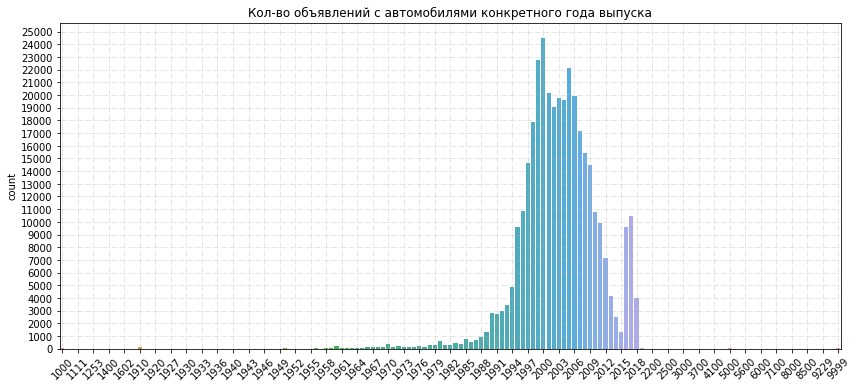

In [18]:
plt.figure(figsize=(14, 6))

plt.title('Кол-во объявлений с автомобилями конкретного года выпуска')

sns.countplot(
    x=np.sort(data.registration_year),
)

xlocs, xlabels = plt.xticks()

plt.xticks(xlocs[::3], xlabels[::3], rotation=45)
plt.yticks(np.arange(0, 25001, 1000))

plt.grid(alpha=.4, linestyle='-.')
plt.show()

Итак, нижней границей выберем **1988 год**, так как кол-во продаваемых автомобилей к этому времени начинает стремительно увеличиваться. На момент 1988 года составляет почти 1000 транспортных средств.

Все автомобили, произведенные ранее и выставленные на продажу, может и представляют интерес для коллекционеров, но все же оценка стоимости раритетных автомобилей не приоритетная цель разработки нашего алгоритма, так как все мелкие детали он учесть вряд ли сможет.

Верхняя граница, как уже говорилось ранее, будет выбрана согласно дате последнего размещенного объявления.

Отсечем не нужное:

In [19]:
data = data.query(
    'registration_year >= 1988 & registration_year <= 2016')

'Удалено {:.2%} объектов'.format(1 - len(data)/start_length)

'Удалено 6.19% объектов'

#### *registration_month*

In [20]:
np.sort(data.registration_month.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Неясна природа возникновения месяца с номером 0. Вполне вероятно, что этим значением заполнили пропущенные значения, но точной уверенности в этом нет.

Пока заменим эти нули на единицу, чтобы не возникло проблем с отсечением объявлений по дате.

In [21]:
data['registration_month'] = data.registration_month.replace(0, 1)

Теперь выполним отсечение объявлений с авто 2016 года выпуска по месяцу, чтобы соответствовать временному промежутку сбора данных. Так как апрель захвачен не весь, а всего лишь неделя из него, то стоит исключить объявления, где автомобиль зарегистрирован позже первой недели апреля 2016 года.

In [22]:
data = data.drop(index=data[(data['registration_year'] == 2016) & (
    data['registration_month'] >= 4)].index)

'Удалено {:.2%} объектов'.format(1 - len(data)/start_length)

'Удалено 7.71% объектов'

В конце отсортируем объявления по дате создания (`date_created`):

In [23]:
data = data.sort_values(by='date_created').reset_index(drop=True)

data.head()

autos.csv,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-16,8999,NaN,2005,NaN,0,147,125000,1,petrol,alfa_romeo,0,2014-03-10,0,79669,2016-04-07
1,2016-03-23,6000,bus,1995,auto,200,other,150000,1,petrol,chevrolet,0,2015-03-20,0,24558,2016-04-07
2,2016-03-05,10400,bus,1993,NaN,0,ducato,30000,1,gasoline,fiat,0,2015-06-18,0,76275,2016-04-05
3,2016-04-02,14250,convertible,2005,manual,163,slk,150000,6,petrol,mercedes_benz,0,2015-08-07,0,76228,2016-04-07
4,2016-03-08,5200,convertible,2006,manual,109,2_reihe,80000,11,petrol,peugeot,0,2015-08-10,0,26382,2016-04-05


#### *power*

In [24]:
np.sort(data.power.unique())

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99,   100,   101,   102,   103,   104,   105,   106,   107,
         108,   109,   110,   111,   112,   113,   114,   115,   116,
         117,   118,   119,   120,   121,   122,   123,   124,   125,
         126,   127,

Значений довольно много и уже видно, что некоторые из них чересчур уж большие. Посмотрим на распределение

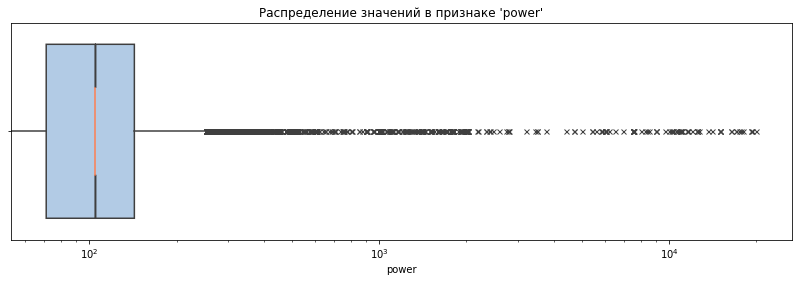

count   327,064.00
mean        112.12
std         182.75
min           0.00
25%          71.00
50%         105.00
75%         143.00
max      20,000.00
Name: power, dtype: float64

In [25]:
def make_boxplot(col, title):
    plt.figure(figsize=(14, 4))
    plt.title(title)

    sns.boxplot(
        x=data[col],
        notch=True,
        showcaps=False,
        flierprops={"marker": "x"},
        boxprops={"facecolor": (.4, .6, .8, .5)},
        medianprops={"color": "coral"})

    plt.xscale('log')
    plt.show()

    return data[col].describe()


# До изменений
make_boxplot('power', 'Распределение значений в признаке \'power\'')

Что-то слишком много неправдоподобных значений...

$Q_3$ равен 143 л.с., а значения тянуться вплоть до 20000 л.с.

Рассчитаем допустимые границы диапазона значений согласно "правилу трех сигм" (немного увеличим значение k с целью захватить в выборку чуть более мощных авто. В качестве примера, некоторые bmw и mercedes класса выше среднего)

In [26]:
Q1 = data['power'].quantile(.25)
Q3 = data['power'].quantile(.75)
IQR = Q3 - Q1
lower, upper = 0, Q3 + 2 * IQR

lower, upper

(0, 287.0)

*287 л.с.* выглядит нормально. Посмотрим, какую долю от всех составляют автомобили с мощностью в вычисленном диапазоне.

In [27]:
'{:.2%}'.format(len(data.query('power <= @upper'))/start_length)

'91.22%'

Более 91% автомобилей имеют мощность менее или равную 287 л.с.

Смысла оставлять супер-мощные машины нет, так как нашей модели выбросы вряд ли помогут лучше обучаться и в целом клиентов с раритетным транспортом не так много, как уже говорилось ранее

In [28]:
data = data.query('power <= @upper').reset_index(drop=True)

new_length = len(data)

'Удалено {:.2%} объектов'.format(1 - len(data)/start_length)

'Удалено 8.78% объектов'

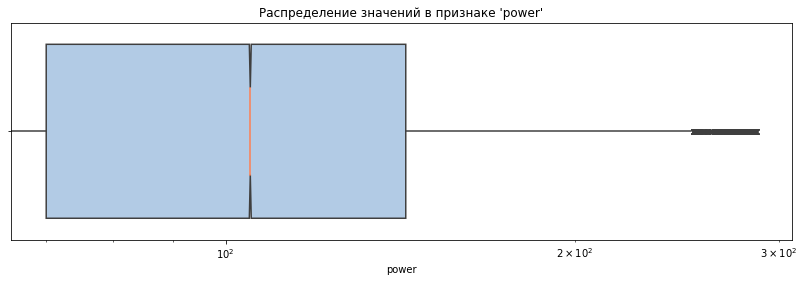

count   323,273.00
mean        106.34
std          58.10
min           0.00
25%          70.00
50%         105.00
75%         143.00
max         287.00
Name: power, dtype: float64

In [29]:
# После изменений
make_boxplot('power', 'Распределение значений в признаке \'power\'')

Верхнюю границу то мы отсекли, а по нижней еще есть вопросы.

Зачем называть то, что ты продаешь автомобилем, если у "этого" 0 лошадиных сил под капотом?))

Нули поменяем на среднее значение авто данного бренда и модели, но сделаем это когда заполним пропуски в признаке `model`.

#### *number_of_pictures*

Абсолютно неинформативный признак. Удалим его.

In [30]:
data = data.drop(columns=['number_of_pictures'])

data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'postal_code', 'last_seen'],
      dtype='object', name='autos.csv')

### *price*

Целевой признак, который требуется предсказать.

Убедимся в "адекватности" представленных данных. Посмотрим на распределение значений.

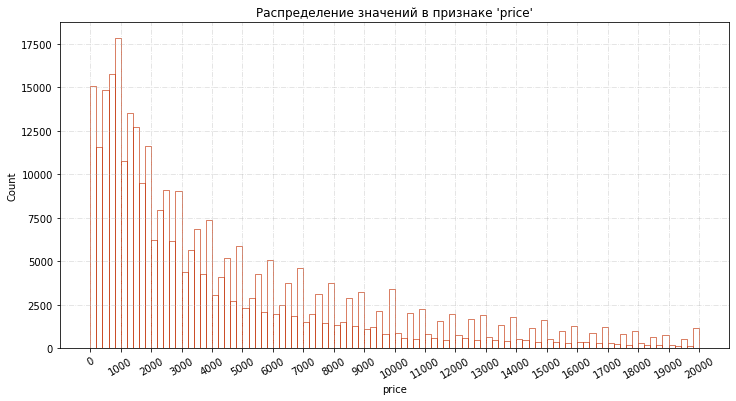

In [31]:
def make_histplot(hist_props, ticks_props=None, hist_title=None):

    plt.figure(figsize=(12, 6))
    if hist_title is not None:
        plt.title(hist_title)

    sns.histplot(**hist_props)

    if ticks_props is not None:
        if len(ticks_props) == 1:
            plt.xticks(**ticks_props[0])
        elif len(ticks_props) == 2:
            plt.xticks(**ticks_props[0])
            plt.yticks(**ticks_props[1])

    plt.grid(alpha=.4, linestyle='-.')
    plt.show()


make_histplot(
    {'x': data['price'], 'color': '#c32f04', 'fill': False, 'bins': 100},
    ({'ticks': np.arange(0, 20001, 1000), 'rotation': 30},),
    'Распределение значений в признаке \'price\''
)

Довольно большое количество околонулевых значений, что не слишком хорошо. Стоит отсечь объявления согласно минимально установленному порогу цены, так как иначе не очень хорошие машины будут оценены в цене ниже, чем они стоят на самом деле.

Посмотрим, сколько составляет доля таких авто в уже немного предобработанных данных. В качестве порога цены выберем значение в *150€*:

In [32]:
price_threshold = 150

'{:.2%}'.format(len(data.query('price <= @price_threshold'))/new_length)

'4.41%'

Чуть более 4% объявлений не настолько критично для удаления, поэтому можем себе позволить)

In [33]:
data = data.query('price >= @price_threshold').reset_index(drop=True)

# Доля удаленных объектов из изначального датасета
'Удалено {:.2%} объектов'.format(1 - len(data)/start_length)

'Удалено 12.37% объектов'

### *postal_code*

Довольно важный признак, по которому можно локализовать пользователя. Локация, вполне очевидно, влияет на конечную цену авто, поэтому стоит разобраться в том, что каждый из почтовых индексов обозначает и, возможно, добавить признаки, содержащие более подробные сведения о регионе продажи автомобиля.

In [34]:
data.postal_code

0         79669
1         24558
2         76275
3         76228
4         26382
          ...  
310527    84364
310528    92421
310529    13437
310530    41372
310531    73660
Name: postal_code, Length: 310532, dtype: int64

\> 8000 различных почтовых индексов!

Поиск в Интернете приводит к осознанию, что компания "Не бит, не крашен" работает по Германии, так как все эти почтовые индексы отсылают к районам именно этой страны.

Система почтовой индексации в Германии предполагает деление страны на 10 основных зон. Индексы пятизначные. То есть, вполне можно классифицировать каждую зону по индексу, что поможет получить представление о том, как те или иные авто пользуются спросом в различных частях страны.

Пропусков нет, однако убедимся в том, все ли значения пятизначные:

In [35]:
len(data[data['postal_code'].apply(lambda x: len(str(x)) == 5)]) == len(data)

False

Видимо нет...

Посмотрим, в чем проблема:

In [36]:
data[data['postal_code'].apply(lambda x: len(str(x)) == 4)]

autos.csv,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,postal_code,last_seen
14,2016-03-19,11999,NaN,2008,manual,150,NaN,90000,1,gasoline,opel,0,2015-11-23,7749,2016-03-27
17,2016-03-07,900,sedan,1997,auto,115,impreza,150000,4,petrol,subaru,0,2015-12-05,2943,2016-03-22
18,2016-03-14,900,sedan,1997,auto,115,impreza,150000,4,petrol,subaru,0,2015-12-05,2943,2016-03-22
19,2016-03-18,900,sedan,1997,auto,115,impreza,150000,4,petrol,subaru,0,2015-12-05,2943,2016-03-23
34,2016-03-07,7399,sedan,2007,manual,116,1er,100000,5,petrol,bmw,0,2016-01-10,8141,2016-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310347,2016-04-07,4490,wagon,2004,manual,116,3er,150000,10,gasoline,bmw,0,2016-04-07,4157,2016-04-07
310428,2016-04-07,480,small,1995,NaN,0,cuore,100000,4,petrol,daihatsu,0,2016-04-07,6886,2016-04-07
310446,2016-04-07,2499,sedan,1997,manual,125,a4,150000,7,petrol,audi,0,2016-04-07,6366,2016-04-07
310457,2016-04-07,199,small,1997,manual,60,ka,80000,12,petrol,ford,0,2016-04-07,4564,2016-04-07


Есть значения, состоящие из четырех цифр. Однако, таких значений индексов и в помине нет.

Вероятно, потерялся 0 в начале, так как в этом столбце значения записаны с типом данных int.

Исправим данное недоразумение. Правда, придется изменить тип данных на str (object).

In [37]:
data['postal_code'] = data.postal_code.astype(str)

data['postal_code'] = data['postal_code'].apply(
    lambda index: '0' + index if len(index) == 4 else index)

len(data[data['postal_code'].apply(lambda x: len(str(x)) == 5)]) == len(data)

True

Отлично!

Теперь, пользуясь информацией о зональном почтовом делении Германии из [Википедии](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D1%87%D1%82%D0%BE%D0%B2%D1%8B%D0%B5_%D0%B8%D0%BD%D0%B4%D0%B5%D0%BA%D1%81%D1%8B_%D0%B2_%D0%93%D0%B5%D1%80%D0%BC%D0%B0%D0%BD%D0%B8%D0%B8#%D0%97%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5), добавим новые признаки (немного упростим работу модели, сократив индекс до трех основных символов):
- `postal_zone`. Первая цифра индекса. Порядковый номер почтовой зоны страны, где продается автомобиль;
- `postal_region`. Следующие две цифры индекса. Обозначают номер региона внутри почтовой зоны.

Для понимания того, какие цифры за каким регионом скрываются:

    
|   | Регион                  | Номер зоны  |   |   |   |   |   |   |   |
|---|:-------------------------|---|---|---|---|---|---|---|---|
|   | Саксония                | 0 |   |   |   |   |   |   |   |
|   | Берлин                  | 1 |   |   |   |   |   |   |   |
|   | Гамбург                 | 2 |   |   |   |   |   |   |   |
|   | Ниж. Саксония           | 3 |   |   |   |   |   |   |   |
|   | с-з Сев. Рейн-Вестфалия | 4 |   |   |   |   |   |   |   |
|   | ю-з Сев. Рейн-Вестфалия | 5 |   |   |   |   |   |   |   |
|   | Гессен                  | 6 |   |   |   |   |   |   |   |
|   | Баден-Вюртемберг        | 7 |   |   |   |   |   |   |   |
|   | Юж. Бавария             | 8 |   |   |   |   |   |   |   |
|   | Сев. Бавария            | 9 |   |   |   |   |   |   |   |


In [38]:
data['postal_zone'] = data['postal_code'].apply(lambda index: index[0]).astype(int)

data['postal_region'] = data['postal_code'].apply(lambda index: index[1:3]).astype(int)

data.head()

autos.csv,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,postal_code,last_seen,postal_zone,postal_region
0,2016-03-16,8999,NaN,2005,NaN,0,147,125000,1,petrol,alfa_romeo,0,2014-03-10,79669,2016-04-07,7,96
1,2016-03-23,6000,bus,1995,auto,200,other,150000,1,petrol,chevrolet,0,2015-03-20,24558,2016-04-07,2,45
2,2016-03-05,10400,bus,1993,NaN,0,ducato,30000,1,gasoline,fiat,0,2015-06-18,76275,2016-04-05,7,62
3,2016-04-02,14250,convertible,2005,manual,163,slk,150000,6,petrol,mercedes_benz,0,2015-08-07,76228,2016-04-07,7,62
4,2016-03-08,5200,convertible,2006,manual,109,2_reihe,80000,11,petrol,peugeot,0,2015-08-10,26382,2016-04-05,2,63


В целом, из признака `postal_code` наиболее полезную информацию мы извлекли, поэтому его можно удалить за ненадобностью.

In [39]:
data.drop(columns=['postal_code'], inplace=True)

Взглянем на распределение количества объявлений в каждой из основных почтовых зон Германии:

In [40]:
postal_zone_dict = {
    0: 'Саксония',
    1: 'Берлин',
    2: 'Гамбург',
    3: 'Нижн.Саксония',
    4: 'с-з Сев.Рейн',
    5: 'ю-з Сев.Рейн',
    6: 'Гессен',
    7: 'Баден',
    8: 'южн. Бавария',
    9: 'сев. Бавария'}

postal_zone_x = [
    postal_zone_dict[i] for i in map(
        lambda x: int(x), data['postal_zone'].value_counts().index.to_list())
]

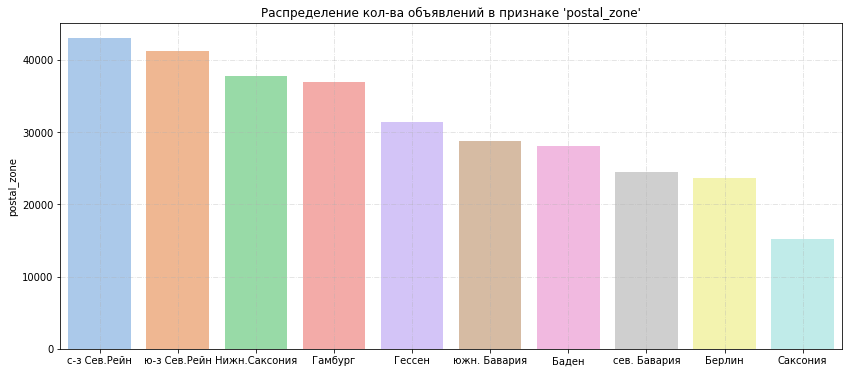

In [41]:
plt.figure(figsize=(14, 6))
plt.title(
    'Распределение кол-ва объявлений в признаке \'postal_zone\'')

sns.barplot(
    x=postal_zone_x,
    y=data['postal_zone'].value_counts(),
    linewidth=2,
    palette=sns.color_palette("pastel"))

plt.grid(alpha=.4, linestyle='-.')
plt.show()

Обобщая, больше всего клиентов у компании "Не бит, не крашен" в западной части страны.

Если не углубляться в исторические предпосылки, то запад Германии попросту богаче востока.

Проверим далее, учтет ли такую особенность наша модель)

### *model* (+нижняя граница в *power*)

Название модели авто. Присутствуют пропущенные значения.

По сути есть два способа заполнить пропуски:
- Парсинг (крайне долго при таком кол-ве объектов);
- Наиболее популярная для своего региона модель. ✅

Второй способ менее точный, но наиболее простой и быстрый, поэтому им и воспользуемся.

In [42]:
model_ptable = data.groupby(['brand', 'postal_zone', 'model'])[
    'postal_zone'].count()

brands = list(set([i[0] for i in model_ptable.index.to_list()]))

for brand in brands:
    for post_zone in range(10):
        region_most_popular_model = model_ptable[(
            brand, post_zone)].idxmax()
        s = data.query('brand == @brand & postal_zone == @post_zone')['model']
        null_index = s.index[s.isnull()].to_list()

        data.loc[null_index, 'model'] = region_most_popular_model

display(data.model.isna().sum())
data.model.value_counts()

1624

golf          27810
other         20275
3er           19362
corsa         11885
polo          11446
              ...  
gl                8
elefantino        7
i3                7
kalina            6
rangerover        3
Name: model, Length: 246, dtype: int64

Осталось 1624 объекта, где пропущенные значения модели все же остались. Посмотрим, что это за объекты:

In [43]:
data[data.model.isna()].head()

autos.csv,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,last_seen,postal_zone,postal_region
26,2016-03-06,5500,other,2009,auto,0,NaN,40000,9,gasoline,sonstige_autos,0,2016-01-02,2016-04-06,3,10
98,2016-03-05,999,NaN,2015,NaN,0,NaN,5000,1,NaN,sonstige_autos,0,2016-02-03,2016-04-05,1,92
428,2016-03-06,2900,convertible,2002,auto,10,NaN,30000,6,petrol,sonstige_autos,0,2016-02-29,2016-03-10,0,81
581,2016-03-05,10900,small,2014,auto,5,NaN,20000,3,gasoline,sonstige_autos,0,2016-03-03,2016-04-06,8,64
851,2016-03-05,4850,suv,2001,auto,238,NaN,150000,5,lpg,sonstige_autos,0,2016-03-03,2016-03-08,6,52


*sonstige_autos* - другие автомобили (с немецкого).

Для таких машин подобрать модель не представляется возможным, как и в целом хоть как-то идентифицировать машину, поэтому логичным решением будет исключить такие объявления из данных

In [44]:
data = data.query('brand != "sonstige_autos"').reset_index(drop=True)

# Доля удаленных объектов из изначального датасета
'Удалено {:.2%} объектов'.format(1 - len(data)/start_length)

'Удалено 12.83% объектов'

---

Как и планировалось заменим нули в признаке `power` средним значением по бренду и модели, дабы исключить нули.

In [45]:
power_ptable = data.groupby(['brand', 'model'])['power'].mean()

brands_models = sorted(
    list(set([i[:2] for i in power_ptable.index.to_list()])))

for brand, model in brands_models:
    mean_auto_power = int(np.round(power_ptable[(brand, str(model))]))
    s = data.query('brand == @brand & model == @model')['power']
    zero_index = s.index[s == 0].to_list()

    data.loc[zero_index, 'power'] = mean_auto_power

data.power.value_counts()

75     21264
60     16619
140    13538
150    13463
101    13202
       ...  
32         1
282        1
3          1
21         1
22         1
Name: power, Length: 286, dtype: int64

Снова посмотрим на распределение:

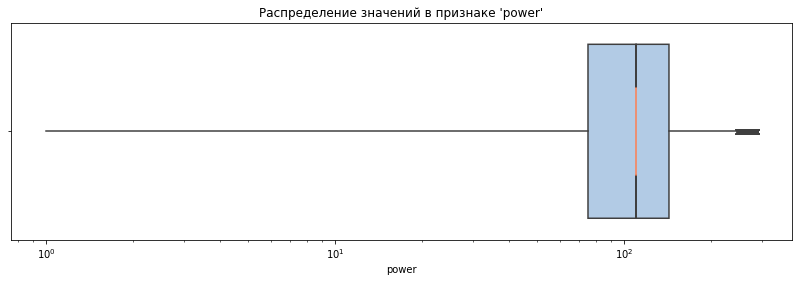

count   308,908.00
mean        117.06
std          47.30
min           1.00
25%          75.00
50%         110.00
75%         143.00
max         287.00
Name: power, dtype: float64

In [46]:
# После изменений
make_boxplot('power', 'Распределение значений в признаке \'power\'')

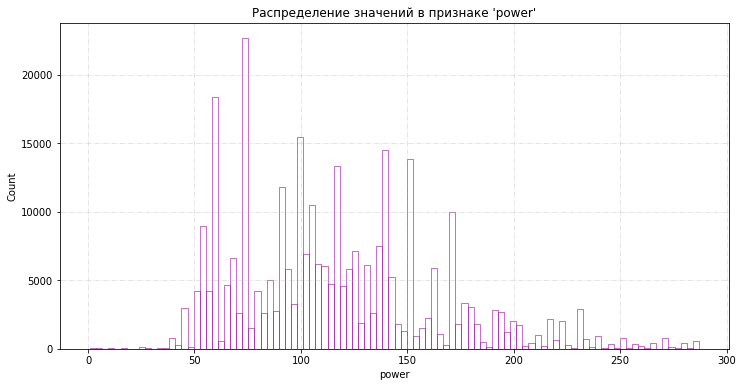

In [47]:
make_histplot(
    {'x': data['power'], 'color': '#a119a6', 'fill': False, 'bins': 100},
    hist_title='Распределение значений в признаке \'power\''
)

Ну, одна лошадиная сила выглядит мощно! Зато не ноль))

### *vehicle_type*, *gearbox*, *fuel_type*

Оставшиеся 3 признака с пропущенными значениями. Технические характеристики авто: тип кузова, тип КПП, тип топлива.

Ввиду отсутствия возможности быстро уточнить точные характеристики каждого из автомобилей, поступим похожим образом как с моделью автомобиля: заполним пропущенные значения, основываясь на наиболее популярных характеристиках авто этого бренда и модели.

In [48]:
specs_ptable = data.groupby(['brand', 'model'])['gearbox'].value_counts()

spec_cols = ['vehicle_type', 'gearbox', 'fuel_type']

for col in spec_cols:
    for brand, model in brands_models:
        most_popular_spec = specs_ptable[(brand, str(model))].idxmax()
        s = data.query('brand == @brand & model == @model')[col]
        null_index = s.index[s.isnull()].to_list()

        data.loc[null_index, col] = most_popular_spec

    print(
        f'Пропусков в признаке {col} осталось {data[col].isna().sum()}')
    display(data[col].value_counts())

Пропусков в признаке vehicle_type осталось 0


sedan          84928
small          75846
wagon          62457
bus            27718
convertible    18576
coupe          13710
manual         11759
suv            10621
other           2600
auto             693
Name: vehicle_type, dtype: int64

Пропусков в признаке gearbox осталось 0


manual    249999
auto       58909
Name: gearbox, dtype: int64

Пропусков в признаке fuel_type осталось 0


petrol      191847
gasoline     92533
manual       17681
lpg           4537
auto          1449
cng            509
hybrid         194
other           97
electric        61
Name: fuel_type, dtype: int64

Быстро и прекрасно!

Если все было сделано верно, то пропусков должно больше не быть:

In [49]:
data.isna().sum()

autos.csv
date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
repaired              0
date_created          0
last_seen             0
postal_zone           0
postal_region         0
dtype: int64

Для удобства еще изменим порядок признаков в датасете, чтобы их было проще воспринимать, а также отбросим уже не нужные признаки:

In [50]:
data = data[
    [
        'price',
        'brand',
        'model',
        'power',
        'gearbox',
        'fuel_type',
        'repaired',
        'kilometer',
        'vehicle_type',
        'registration_month',
        'registration_year',
        'postal_zone',
        'postal_region'
    ]
]

data.head()

autos.csv,price,brand,model,power,gearbox,fuel_type,repaired,kilometer,vehicle_type,registration_month,registration_year,postal_zone,postal_region
0,8999,alfa_romeo,147,113,manual,petrol,0,125000,manual,1,2005,7,96
1,6000,chevrolet,other,200,auto,petrol,0,150000,bus,1,1995,2,45
2,10400,fiat,ducato,91,manual,gasoline,0,30000,bus,1,1993,7,62
3,14250,mercedes_benz,slk,163,manual,petrol,0,150000,convertible,6,2005,7,62
4,5200,peugeot,2_reihe,109,manual,petrol,0,80000,convertible,11,2006,2,63


In [51]:
# Доля удаленных объектов из изначального датасета
print('Размер датасета уменьшился на {:.2%} в ходе предобработки.\n'
      'Текущее кол-во объектов {}'.format(1 - len(data)/start_length, len(data)))

Размер датасета уменьшился на 12.83% в ходе предобработки.
Текущее кол-во объектов 308908


Отлично! Можно двигаться дальше!

<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
- Были переименованы признаки в "snake_case";
- Удалены немногочисленные явные дубликаты;
- Изменены типы данных, где это было необходимо;
- Удалены ошибочные записи, данные отсортированы по дате публикации объявлений;
- Скорректированы распределения некоторых величин;
- Из признака `postal_code` сделали два новых признака: `postal_zone` и `postal_region`;
- Пропуски (или нули) в `model`, `power`, `vehicle_type`, `gearbox`, `fuel_type` были частично заполнены модой по бренду, модели или региону продажи авто;
- Исключены неинформативные признаки.
    
</div>

## Обучение моделей 🦾

Следующим шагом будет обучение моделей машинного обучения.

В данном проекте будут рассмотрены следующие модели в роли кандидатов на лучшую модель:
- <tt>LinearRegression</tt>;
- <tt>HistGradientBoostingRegressor</tt>;
- <tt>LGBMRegressor</tt> из библиотеки *LightGBM*;
- <tt>CatBoostRegressor</tt> из библиотеки *CatBoost*.

Но для начала стоит сформировать тренировочную и тестовую выборки для наших моделей, а также преобразовать категориальные признаки для линейных моделей.

### Формирование тренировочной и тестовой выборок

Соотношение 3:1.

Значение аргумента <tt>shuffle=False</tt>, так как данные осортированы во временной последовательности размещения объявлений.

In [52]:
train, test = train_test_split(
    data, shuffle=False, test_size=0.25, random_state=STATE)

X_train = train.drop(columns=['price'])
y_train = train['price']

X_test = test.drop(columns=['price'])
y_test = test['price']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((231681, 12), (231681,), (77227, 12), (77227,))

### MEstimateEncoder

Как известно, линейные модели не работают с категориальными признаками, поэтому для них потребуется их преобразовать. Воспользуемся техникой преобразования `MEstimateEncoder`.

In [53]:
enc = MEstimateEncoder()

enc.fit(X_train, y_train)

X_train = pd.DataFrame(
    enc.transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(
    enc.transform(X_test), columns=X_test.columns)

display(X_train.head())
X_test.head()

autos.csv,brand,model,power,gearbox,fuel_type,repaired,kilometer,vehicle_type,registration_month,registration_year,postal_zone,postal_region
0,"3,637.83","2,267.90",113,"4,043.58","3,723.71",0,125000,"2,122.36",1,2005,7,96
1,"5,275.07","4,091.95",200,"6,762.47","3,723.71",0,150000,"5,561.78",1,1995,2,45
2,"2,775.80","4,079.22",91,"4,043.58","6,728.32",0,30000,"5,561.78",1,1993,7,62
3,"5,906.16","8,707.85",163,"4,043.58","3,723.71",0,150000,"6,693.93",6,2005,7,62
4,"3,206.26","3,051.60",109,"4,043.58","3,723.71",0,80000,"6,693.93",11,2006,2,63


autos.csv,brand,model,power,gearbox,fuel_type,repaired,kilometer,vehicle_type,registration_month,registration_year,postal_zone,postal_region
231681,"5,906.16","15,723.54",170,"6,762.47","6,728.32",0,100000,"9,059.73",7,2009,8,45
231682,"3,262.05","3,374.00",125,"4,043.58","3,723.71",0,100000,"5,561.78",3,2007,3,61
231683,"4,882.35","7,272.60",147,"4,043.58","3,723.71",0,60000,"5,561.78",3,2013,5,45
231684,"3,597.97","3,636.96",55,"4,043.58","3,723.71",0,80000,"2,747.95",12,2001,9,76
231685,"2,392.87","2,278.57",120,"4,043.58","3,723.71",0,70000,"4,731.85",4,1999,0,62


### StandardScaler

Также данные по-хорошему стоит стандартизировать, так как различия в значениях признака `kilometer` и `power` чересчур уж велики, к примеру. Воспользуемся алгоритмом `StandardScaler()`

In [54]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(
    scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(
    scaler.transform(X_test), columns=X_test.columns)


display(X_train.head())
X_test.head()

autos.csv,brand,model,power,gearbox,fuel_type,repaired,kilometer,vehicle_type,registration_month,registration_year,postal_zone,postal_region
0,-0.64,-0.96,-0.09,-0.49,-0.57,-0.33,-0.11,-1.65,-1.39,0.37,0.95,1.70
1,0.49,-0.20,1.75,2.06,-0.57,-0.33,0.58,0.67,-1.39,-1.45,-1.01,-0.15
2,-1.23,-0.20,-0.55,-0.49,1.47,-0.33,-2.71,0.67,-1.39,-1.81,0.95,0.46
3,0.93,1.74,0.97,-0.49,-0.57,-0.33,0.58,1.44,0.02,0.37,0.95,0.46
4,-0.93,-0.63,-0.17,-0.49,-0.57,-0.33,-1.34,1.44,1.43,0.55,-1.01,0.50


autos.csv,brand,model,power,gearbox,fuel_type,repaired,kilometer,vehicle_type,registration_month,registration_year,postal_zone,postal_region
0,0.93,4.69,1.12,2.06,1.47,-0.33,-0.79,3.03,0.30,1.10,1.34,-0.15
1,-0.89,-0.50,0.17,-0.49,-0.57,-0.33,-0.79,0.67,-0.83,0.73,-0.62,0.43
2,0.22,1.14,0.63,-0.49,-0.57,-0.33,-1.88,0.67,-0.83,1.82,0.17,-0.15
3,-0.66,-0.39,-1.31,-0.49,-0.57,-0.33,-1.34,-1.22,1.71,-0.36,1.73,0.97
4,-1.49,-0.96,0.06,-0.49,-0.57,-0.33,-1.61,0.11,-0.55,-0.72,-1.79,0.46


### <tt>Linear Regression</tt>

Для начала сделаем скорер для RMSE, чтобы верно интерпретировать значения данной метрики на всех этапах обучения и валидации моделей.

In [55]:
rmse_scorer = make_scorer(mean_squared_error, squared=False)

In [56]:
lr_stime = time()

lr = LinearRegression()

lr_cv = cross_val_score(
    lr, X_train, y_train, cv=5, scoring=rmse_scorer)
lr_cv_time = time()

lr_rmse = lr_cv.mean()

lr_full_time = time()

print(f'Linear Regression. Cross-val RMSE -> {lr_rmse}.\n'
      f'Cross-validation time (Fit+Predict) -> {round(lr_cv_time - lr_stime, 2)} с.\n')

Linear Regression. Cross-val RMSE -> 2477.2744794802047.
Cross-validation time (Fit+Predict) -> 1.03 с.



### <tt>HistGradientBoostingRegressor</tt>

Аналог <tt>GradientBoostingRegressor</tt>, который лучше оптимизирован под работу с большими данными (более 10000 объектов в выборке).

Напишем функцию `GS_best_params` для более удобного поиска гиперпараметров модели с помощью `GridSearchCV`

In [57]:
def GS_best_params(model,
                   params_grid,
                   train_features,
                   train_target,
                   scorer=rmse_scorer,
                   cv_rate=2,
                   cv_shuffle=False,
                   refit=True,
                   verbose=2,
                   n_jobs=-1):

    GS = GridSearchCV(model,
                      params_grid,
                      cv=KFold(cv_rate, shuffle=cv_shuffle),
                      refit=refit,
                      scoring=scorer,
                      verbose=verbose,
                      n_jobs=n_jobs).fit(train_features, train_target)

    return GS

In [58]:
hgbr_stime = time()

hgbr = HistGradientBoostingRegressor(random_state=STATE)

hgbr_grid = {
    'max_iter': [150, 300],
    'learning_rate': [.5, 1]}

hgbr_gs = GS_best_params(hgbr, hgbr_grid, X_train, y_train)
hgbr_gs_time = time()

hgbr = hgbr_gs.best_estimator_

hgbr_rmse = hgbr_gs.best_score_

hgbr_full_time = time()

print(f'\n\n{str(hgbr)}.\nCross-val RMSE -> {hgbr_rmse}\n'
      f'GridSearchCV time (Fit + Predict) -> {round(hgbr_gs_time - hgbr_stime, 2)} с.\n')

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ....................learning_rate=0.5, max_iter=150; total time=14.2min
[CV] END ....................learning_rate=0.5, max_iter=150; total time=  26.7s
[CV] END ....................learning_rate=0.5, max_iter=300; total time=  12.2s
[CV] END ....................learning_rate=0.5, max_iter=300; total time=  17.9s
[CV] END ......................learning_rate=1, max_iter=150; total time=   6.0s
[CV] END ......................learning_rate=1, max_iter=150; total time=   7.5s
[CV] END ......................learning_rate=1, max_iter=300; total time=   6.3s
[CV] END ......................learning_rate=1, max_iter=300; total time=   7.4s


HistGradientBoostingRegressor(learning_rate=1, max_iter=150,
                              random_state=RandomState(MT19937) at 0x7F44F1385540).
Cross-val RMSE -> 1668.9336034639705
GridSearchCV time (Fit + Predict) -> 975.71 с.



### <tt>LGBMRegressor</tt>

In [59]:
lgbmr_stime = time()

lgbmr = LGBMRegressor(random_state=42)

lgbmr_grid = {
    'n_estimators': [50, 300],
    'learning_rate': [.25, 1]}

lgbmr_gs = GS_best_params(lgbmr, lgbmr_grid, X_train, y_train)
lgbmr = lgbmr_gs.best_estimator_

lgbmr_gs_time = time()

lgbmr_rmse = lgbmr_gs.best_score_

lgbmr_full_time = time()

print(f'\n\n{str(lgbmr)}.\nCross-val RMSE -> {lgbmr_rmse}\n'
      f'GridSearchCV time (Fit + Predict) -> {round(lgbmr_gs_time - lgbmr_stime, 2)} с.\n')

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ................learning_rate=0.25, n_estimators=50; total time=  36.6s
[CV] END ................learning_rate=0.25, n_estimators=50; total time=  40.9s
[CV] END ...............learning_rate=0.25, n_estimators=300; total time= 1.4min
[CV] END ...............learning_rate=0.25, n_estimators=300; total time=  29.3s
[CV] END ...................learning_rate=1, n_estimators=50; total time=   2.4s
[CV] END ...................learning_rate=1, n_estimators=50; total time=   3.2s
[CV] END ..................learning_rate=1, n_estimators=300; total time=   9.7s
[CV] END ..................learning_rate=1, n_estimators=300; total time=   9.9s


LGBMRegressor(learning_rate=1, n_estimators=300, random_state=42).
Cross-val RMSE -> 1734.3683069763467
GridSearchCV time (Fit + Predict) -> 229.29 с.



### <tt>CatBoostRegressor</tt>

In [60]:
cbr_stime = time()

cbr = CatBoostRegressor(verbose=False, random_seed=42)

cbr_grid = {
    'iterations': [300, 400],
    'learning_rate': [.5, 1]}

cbr_gs = GS_best_params(cbr, cbr_grid, X_train, y_train)
cbr_gs_time = time()

cbr = cbr_gs.best_estimator_

cbr_rmse = cbr_gs.best_score_

cbr_full_time = time()

print(f'\n\nCatBoostRegressor.\nCross-val RMSE -> {cbr_rmse}\n'
      f'GridSearchCV time (Fit + Predict) -> {round(cbr_gs_time - cbr_stime, 2)} c.\n')

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ..................iterations=300, learning_rate=0.5; total time=   5.9s
[CV] END ..................iterations=300, learning_rate=0.5; total time=   6.1s
[CV] END ....................iterations=300, learning_rate=1; total time=   5.8s
[CV] END ....................iterations=300, learning_rate=1; total time=   6.1s
[CV] END ..................iterations=400, learning_rate=0.5; total time=   8.0s
[CV] END ..................iterations=400, learning_rate=0.5; total time=   7.9s
[CV] END ....................iterations=400, learning_rate=1; total time=   7.7s
[CV] END ....................iterations=400, learning_rate=1; total time=   7.8s


CatBoostRegressor.
Cross-val RMSE -> 1586.9741302580728
GridSearchCV time (Fit + Predict) -> 69.48 c.



### Результаты обучения моделей

In [61]:
models_results = pd.DataFrame(
    {'Model': [
        'LinearRegression',
        'HistGradientBoostingRegressor',
        'LGBMRegressor',
        'CatBoostRegressor'],

     'Cross-val RMSE': [
         lr_rmse,
         hgbr_rmse,
         lgbmr_rmse,
         cbr_rmse],

     'GridSearchCV/Cross-val time (Fit + Predict)': [
         round(lr_cv_time - lr_stime, 2),
         round(hgbr_gs_time - hgbr_stime, 2),
         round(lgbmr_gs_time - lgbmr_stime, 2),
         round(cbr_gs_time - cbr_stime, 2)]
     }
)

models_results = models_results.sort_values(by='Cross-val RMSE', ascending=True)
models_results

,Model,Cross-val RMSE,GridSearchCV/Cross-val time (Fit + Predict)
3,CatBoostRegressor,"1,586.97",69.48
1,HistGradientBoostingRegressor,"1,668.93",975.71
2,LGBMRegressor,"1,734.37",229.29
0,LinearRegression,"2,477.27",1.03


<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого

Обычная линейная модель <tt>LinearRegression</tt> не идет ни в какое сравнение с моделями градиентного бустинга, так как значение <tt>RMSE</tt> у нее практически вдвое больше. Под условия ТЗ она, конечно, подходит, но смысла ее рассматривать нет.

Наименьшие значения <tt>RMSE</tt> показали модели <tt>LGBMRegressor</tt> и <tt>HistGradientBoostingRegressor</tt>. Однако, время, затраченное на подбор гиперпараметров и обучение модели, слишком большое, относительно других моделей.

Модель <tt>CatBoostRegressor</tt> имеет значение <tt>RMSE</tt> чуть хуже, чем предыдущие две модели, но при этом сильно выигрывает по времени подбора гиперпараметров, обучения и формирования предсказаний.
    
Итого, в качестве модели для тестирования была выбрана:
    
<clear></clear>
    
<center><code>CatBoostRegressor(iterations=400, learning_rate=0.5)</code></center>
    
    
</div>

## Тестирование модели 💯

### Test RMSE

In [62]:
cbr_test_stime = time()

cbr_test_preds = cbr.predict(X_test)
cbr_test_pred_time = time()

cbr_test_rmse = mean_squared_error(y_test, cbr_test_preds, squared=False)

print(f'Model: CatBoostRegressor(iterations=400, learning_rate=0.5)\n'
      f'Test RMSE: {round(cbr_test_rmse, 2)}\n'
      f'Prediction time: {round(cbr_test_pred_time - cbr_test_stime, 2)} с.')

Model: CatBoostRegressor(iterations=400, learning_rate=0.5)
Test RMSE: 1523.62
Prediction time: 0.05 с.


<div style="border: 3px solid rgb(255, 119, 119); padding: 20px">

**Конечное значение <tt>RMSE</tt> на тестовой выборке - <tt>1523.62</tt>.**
    
</div>

### Проверка на адекватность

Проверим модель на адекватность, сравнив значения <tt>RMSE</tt> dummy-модели и нашей модели на тестовой выборке, чтобы оценить действительно ли наша модель обладает предсказательной силой.

In [63]:
dr_stime = time()

dr = DummyRegressor(strategy='mean')

dr.fit(X_train, y_train)
dr_fit_time = time()

dr_test_preds = dr.predict(X_test)
dr_test_pred_time = time()

dr_test_rmse = mean_squared_error(y_test, dr_test_preds, squared=False)

print(f'Model: DummyRegressor(strategy=\'mean\')\n'
      f'Test RMSE: {round(dr_test_rmse, 2)}\n'
      f'Fit time: {round(dr_fit_time - dr_stime, 2)}\n'
      f'Prediction time: {round(dr_test_pred_time - dr_fit_time, 2)} с.', end='\n\n')

if dr_test_rmse > cbr_test_rmse:
    print(f'✅ Модель адекватна.')
else:
    print(f'❌ Модель не прошла проверку на адекватность')

Model: DummyRegressor(strategy='mean')
Test RMSE: 4533.33
Fit time: 0.0
Prediction time: 0.0 с.

✅ Модель адекватна.


## Общий вывод 👀

<div style="border: 3px solid rgb(119,212,150); padding: 20px">
    
Для немецкого сервиса по продажи поддержанных авто "Не бит, не крашен" была разработана и протестирована модель машинного обучения для прогнозирования рыночной цены автомобиля исходя из его технических характеристик.
    
### Краткая сводка по выполненным задачам

#### Шаг 1. Обзор данных
    
- Импортированы необходимые библиотеки;
- Данные загружены и прочитаны, предусмотрены альтернативные способы получения исходных данных;
- Оценена информация о данных;

#### Шаг 2. Предобработка данных
    
- Были переименованы признаки в "snake_case";
- Удалены немногочисленные явные дубликаты;
- Изменены типы данных, где это было необходимо;
- Удалены ошибочные записи, данные отсортированы по дате публикации объявлений;
- Скорректированы распределения некоторых величин;
- Из признака `postal_code` сделали два новых признака: `postal_zone` и `postal_region`;
- Пропуски (или нули) в `model`, `power`, `vehicle_type`, `gearbox`, `fuel_type` были частично заполнены модой по бренду, модели или региону продажи авто;
- Исключены неинформативные признаки;

#### Шаг 3. Обучение моделей
    
    
- Категориальные признаки закодированы при помощи <tt>MEstimateEncoder</tt>;
- Выборки отмасшабированы при помощи <tt>StandardScaler</tt>;
    
<center>Итоговая сводная таблица с результатами этапа</center>
  
    
| Модель                        | Значение RMSE на кросс-валидации/GridSearchCV | Время на Fit+Predict (сек.) |
|-------------------------------|-----------------------------------------------|-----------------------------|
| CatBoostRegressor             | 1,586.97                                      | 69.48                       |
| HistGradientBoostingRegressor | 1,668.93                                      | 975.71                      |
| LGBMRegressor                 | 1,734.37                                      | 229.29                      |
| LinearRegression              | 2,477.27                                      | 1.03                        |

Исходя из критериев заказчика была выбрана модель <tt>CatBoostRegressor(iterations=400, learning_rate=0.5)</tt>.
    
#### Шаг 4. Тестирование модели
    
- Модель была протестирована на тестовом наборе данных. Значение <tt>RMSE</tt> - <tt>1523.62</tt>;
- Модель была проверена на адекватность. Модель адекватна.
</div>